# Solving ODEs with the Euler integrator

**Ordinary differential equations** ([ODE](http://mathworld.wolfram.com/OrdinaryDifferentialEquation.html)s) describe many phenomena in physics. They describe the changes of a **dependent variable** $y(t)$ as a function of a **single independent variable** (e.g. $t$ or $x$).

- An ODE of order $n$ contains $\frac{d^n y}{dt^n}$ as the highest derivative.

  For example, **Newton's equations of motion** 
  
  $$
  F = m \frac{d^2 x(t)}{dt^2}
  $$
  
  are second order ODEs.

- An ODE of order $n$ requires $n$ initial conditions to uniquely determine a solution $y(t)$.
  For Newton: we need initial position $x(t=0)$ and velocity $v(t=0)$.
  
- Linear ODEs contain no higher powers than 1 of any of the derivatives (including the 0-th derivative $y$ term).

- Non-linear ODEs can contain any powers in the dependent variable and its derivatives.

## ODE Algorithms
First order ODE:

$$
\frac{dy}{dt} = f(t, y)
$$

Basic idea: 
1. Start with initial conditions, $y_0 \equiv y(t=0)$
2. Use $\frac{dy}{dt} = f(t, y)$ (the RHS!) to advance solution a small step $h$ forward in time: $y(t=h) \equiv y_1$
3. Repeat with $y_1$ to obtain $y_2 \equiv y(t=2h)$... and for all future values of $t$.

### Euler's rule
Use the forward difference approximation for the derivative:

$$
f(t, y) = \frac{dy(t)}{dt} \approx \frac{y(t_{n+1}) - y(t_n)}{h}
$$

$$
y_{n+1} \approx y_n + h f(t_n, y_n) \quad \text{with} \quad y_n := y(t_n)
$$

### Convert 2nd order ODE to 2 coupled 1st order ODEs
The 2nd order ODE is
$$
\frac{d^2 y}{dt^2} = f(t, y)
$$

Introduce "dummy" dependent variables $y_i$ with $y_0 \equiv y$ and

\begin{alignat}{1}
\frac{dy}{dt} &= \frac{dy_0}{dt} &=   y_1\\
\frac{d^2y}{dt^2} &= \frac{dy_1}{dt} &= {} f(t, y_0).
\end{alignat}


The first equation defines the velocity $y_1 = v$ and the second one is the original ODE.

## Bouncing ball 

Problem: Integrate the equations of a bouncing ball under gravity
* Drop from height $y_0 = 2$ within initial velocity $v_0 = 0$. 
* The ball bounces elastically off the ground at $y=0$.

We have to solve the *second order ODE* (Newton's equations of motion with constant acceleration)

$$
\frac{d^2 y}{dt^2} = -g.
$$

The Euler scheme for any *first order ODE* 

$$
\frac{dy}{dt} = f(y, t)
$$

is
$$
y(t + h) = y(t) + h f(y(t), t).
$$

In order to solve the original 2nd order equation of motion we make use of the fact that one $n$-th order ODE can be written as $n$ coupled first order ODEs, namely 

\begin{align}
\frac{dy}{dt} &= v\\
\frac{dv}{dt} &= -g.
\end{align}

Solve each of the first order ODEs with Euler:

\begin{align}
y(t + h) &= y(t) + h v(t)\\
v(t + h) &= v(t) - h g.
\end{align}

### Free fall 

Start with free fall as an even simpler problem.

In [3]:
import numpy as np

In [9]:
# parameters
g = -9.81
# initial conditions
y = 2.0
v = 0.0

t = 0
dt = 0.01
data = []
while t < 10:
    y = y + v*dt
    v = v + g*dt
    data.append([t, y, v]) 
    t += dt

data = np.array(data) 

In [5]:
data.shape

(1001, 3)

In [6]:
data = data.transpose()
data.shape  # t, y, v

(3, 1001)

Plot the trajectory $y(t)$ with matplotlib.

(Using `data[0]` for time and `data[1]` for position.)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

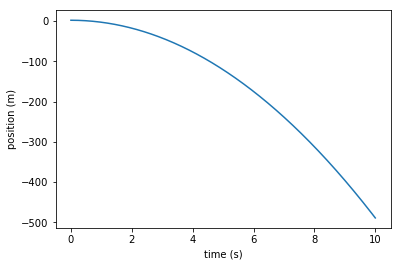

In [8]:
plt.plot(data[0], data[1])
plt.xlabel("time (s)")
plt.ylabel("position (m)");

### Bouncing
Add a floor at $y = 0$.

What happens at the floor? – The velocity changes (elastic collision).

In [12]:
# parameters
g = -9.81
y_floor = 0

# initial conditions
y = 2.0
v = 0.0

t = 0
dt = 0.01
data = []
while t < 10:
    y += v*dt
    if y > y_floor:
        v += g*dt
    else:
        v = -v   # bounce off floor
    data.append([t, y, v]) 
    t += dt

data = np.array(data).transpose() 

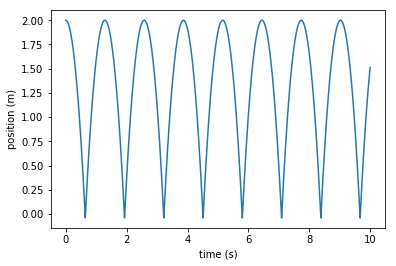

In [13]:
plt.plot(data[0], data[1])
plt.xlabel("time (s)")
plt.ylabel("position (m)");

## Summary: Euler integrator 

1. If the order of the ODE > 1 then write the ODE as a coupled system of n first order ODEs.

   For Newton's EOM ($F = m\frac{d^2}{dt^2}:
   
   \begin{align}
   \frac{dx}{dt} &= v\\
   \frac{dv}{dt} &= m^{-1}F
   \end{align}
   
   Note that $F$ typically depends on $x$, e.g., $F(x) = -\frac{\partial U}{\partial x}$ when the force can be derived from a potential energy function $U(x)$.
2. Solve all first order ODEs with the forward Euler algorithm for time step $\Delta t$:

   \begin{align}
   x_{t+1} &= x_t + v \Delta t\\
   v_{t+1} &= v_t + m^{-1} F(x_t) \Delta t
   \end{align}



The time step of the Euler algorithm has to be chosen small because the error in $x(t)$ will go like $\Delta t^2$ – Euler is really a terrible algorithm but for this introductory class it is good enough. Better algorithms exist and are not much more difficult (see, e.g., PHY432 Computational Methods).